# Housing Price Prediction Project
##Project Overview
###Goal: Predict California housing prices based on features like income, location, and house characteristics.


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

###Load the Data

In [53]:
url= "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
Raw_data=pd.read_csv(url)

In [54]:
data=Raw_data.copy()

###Initial Data Exploration and Data Cleaning

In [55]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [56]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [57]:
data=data.dropna(subset="total_bedrooms")

###Data Visualization

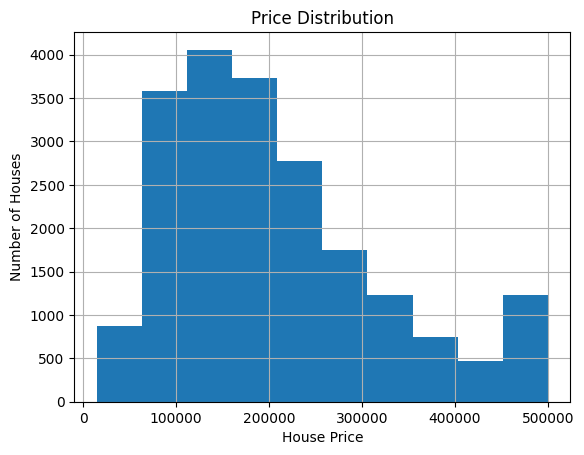

In [58]:
data['median_house_value'].hist()
plt.xlabel("House Price")
plt.ylabel("Number of Houses")
plt.title("Price Distribution")
plt.show()

###Feature Engineering

In [59]:
data['rooms_per_house']= data['households']/data['total_rooms']
data['people_per_house']= data['households']/data['population']

###Correlation Analysis

In [60]:
data = pd.get_dummies(data, columns=['ocean_proximity'])
corre= data.corr()['median_house_value'].sort_values(ascending=False)
corre

median_house_value            1.000000
median_income                 0.688355
people_per_house              0.264354
ocean_proximity_<1H OCEAN     0.257614
ocean_proximity_NEAR BAY      0.160526
ocean_proximity_NEAR OCEAN    0.140378
total_rooms                   0.133294
housing_median_age            0.106432
households                    0.064894
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023525
population                   -0.025300
longitude                    -0.045398
latitude                     -0.144638
rooms_per_house              -0.214614
ocean_proximity_INLAND       -0.484787
Name: median_house_value, dtype: float64

###Scatter Plot - People Per House vs Price

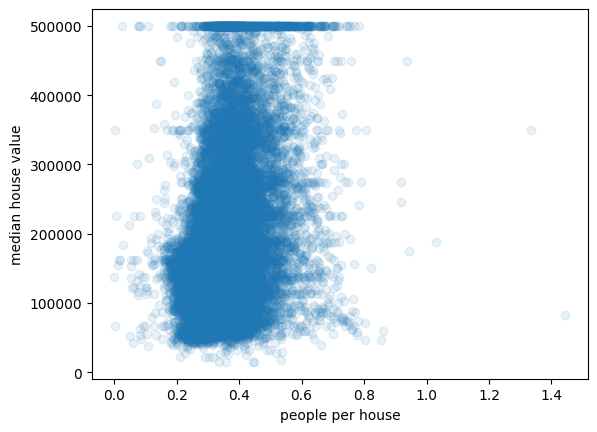

In [61]:
plt.scatter(data['people_per_house'],data['median_house_value'],alpha=0.1)
plt.xlabel('people per house')
plt.ylabel('median house value')
plt.show()

###Prepare Feature Sets
creating different feature sets: base only, engineered only, and combined features

In [62]:
base_features= ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity_<1H OCEAN','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']
eng_features= ['rooms_per_house','people_per_house',]
all_features= base_features + eng_features

In [63]:
X =data[base_features]
X_eng=data[eng_features]
X_all=data[all_features]
y =data['median_house_value']

###Train-Test Split
spliting the data into training and testing sets (80/20 split) to evaluate model performance on unseen data.

In [64]:
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)
X_eng_train,X_eng_test,y_eng_train, y_eng_test = train_test_split(X_eng,y,test_size=0.2,random_state=42)
X_all_train,X_all_test,y_all_train, y_all_test = train_test_split(X_all,y,test_size=0.2,random_state=42)

###Linear Regression Modeling
trained three separate Linear Regression models using different feature sets.

In [65]:
model_base=LinearRegression()
model_base.fit(X_train,y_train)

LinearRegression()

In [66]:
model_eng=LinearRegression()
model_eng.fit(X_eng_train,y_eng_train)

LinearRegression()

In [67]:
model_all=LinearRegression()
model_all.fit(X_all_train,y_all_train)

LinearRegression()

###Make Predictions and Evaluate
Lower MSE (mean squared error) = better model. compare which feature set worked best.

In [68]:
pred_base=model_base.predict(X_test)
pred_eng=model_eng.predict(X_eng_test)
pred_all=model_all.predict(X_all_test)

In [69]:
mse_base=mean_squared_error(y_test,pred_base)
mse_eng=mean_squared_error(y_eng_test,pred_eng)
mse_all=mean_squared_error(y_all_test,pred_all)

In [70]:
mse_base,mse_eng,mse_all

(4795768912.524831, 11974810090.588823, 4446075306.960675)

###Random Forest Regression
Random Forest is a more complex model, usually performing better on non-linear relationships.

In [71]:
rf_model=RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_all_train,y_all_train)

RandomForestRegressor(random_state=42)

In [72]:
rfpred= rf_model.predict(X_all_test)

In [73]:
rf_mse= mean_squared_error(y_all_test,rfpred)

In [74]:
rf_mse

2639984044.0132174

###Feature Importance Visualization

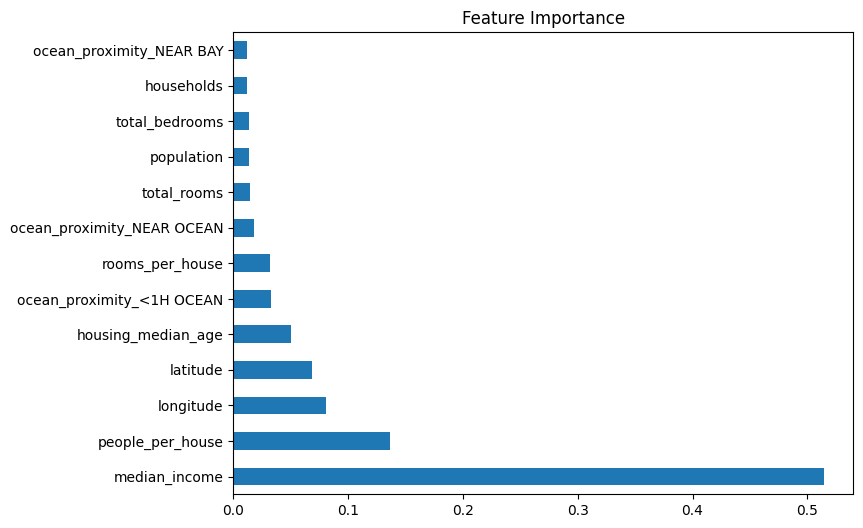

In [75]:
feature_imp= pd.Series(rf_model.feature_importances_,index=X_all.columns)
feature_imp.sort_values(ascending=False).plot(kind='barh',figsize=(8,6))
plt.title("Feature Importance")
plt.show()

#Final Conclusion

Random Forest performed better than Linear Regression.

"Median Income" was the most important feature for prediction.

Feature engineering had little effect here, but in other projects it can be crucial!

Future improvements: Hyperparameter tuning, adding more features.

# Setting up basic project structure for MLOps